# **Análisis de Azar y Probabilidad en Negocios**

### Objetivo: Analizar el papel del azar y la probabilidad en un escenario real de negocios, utilizando la fórmula de la probabilidad total y simulaciones computacionales, el ejemplo corresponde a una tienda online con dos fuentes de tráfico principales: Google Ads y Facebook Ads.


*   Cuál es la probabilidad global de que un visitante realice una compra
*   Cuántos compradores se podrían esperar en un volumen determinado de visitantes.

*   Cómo el azar puede influir para que los resultados reales difieran de la estimación teórica.


# **Importamos las librerías y dependecias necesarias.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# ========================
# 1 Datos del problema
# ========================
P_Google = 0.60
P_Facebook = 0.40

P_Compra_Google = 0.05
P_Compra_Facebook = 0.03



# **Aplicación de la fórmula de la probabilidad total**

Se aplicó:

𝑃(Compra)=𝑃(Google)⋅𝑃(Compra∣Google)+𝑃(Facebook)⋅𝑃(Compra∣Facebook)
P(Compra)=P(Google)⋅P(Compra∣Google)+P(Facebook)⋅P(Compra∣Facebook)
Reemplazando valores:
𝑃(Compra)=(0.60×0.05)+(0.40×0.03)=0.042
P(Compra)=(0.60×0.05)+(0.40×0.03)=0.042
Resultado: 4.20% de probabilidad total de compra.

In [4]:
# ========================
# 2 Probabilidad teórica (fórmula de la probabilidad total)
# ========================
P_Compra_Total = (P_Google * P_Compra_Google) + (P_Facebook * P_Compra_Facebook)



# **Preguntas que se querían resolver**

¿Cuál es la probabilidad total de que un visitante compre, considerando la mezcla de canales de tráfico?

¿Qué peso aporta cada canal en la conversión total?

Si recibimos un número específico de visitantes, ¿cuántas compras se pueden esperar?

¿Qué tan diferente podría ser el resultado real debido al azar en el comportamiento de los clientes?


In [5]:
# ========================
# 3 Simulación base con NumPy
# ========================
np.random.seed(42)
n_visitas = 100_000

fuentes = np.random.choice([1, 0], size=n_visitas, p=[P_Google, P_Facebook])
compras = np.zeros(n_visitas, dtype=int)

compras[fuentes == 1] = np.random.rand(np.sum(fuentes == 1)) < P_Compra_Google
compras[fuentes == 0] = np.random.rand(np.sum(fuentes == 0)) < P_Compra_Facebook

P_Compra_Simulada = compras.mean()

In [6]:
# ========================
# 4 Simulación Monte Carlo
# ========================
n_simulaciones = 500
resultados = []

for _ in range(n_simulaciones):
    fuentes_mc = np.random.choice([1, 0], size=n_visitas, p=[P_Google, P_Facebook])
    compras_mc = np.zeros(n_visitas, dtype=int)
    compras_mc[fuentes_mc == 1] = np.random.rand(np.sum(fuentes_mc == 1)) < P_Compra_Google
    compras_mc[fuentes_mc == 0] = np.random.rand(np.sum(fuentes_mc == 0)) < P_Compra_Facebook
    resultados.append(compras_mc.mean())

resultados = np.array(resultados)



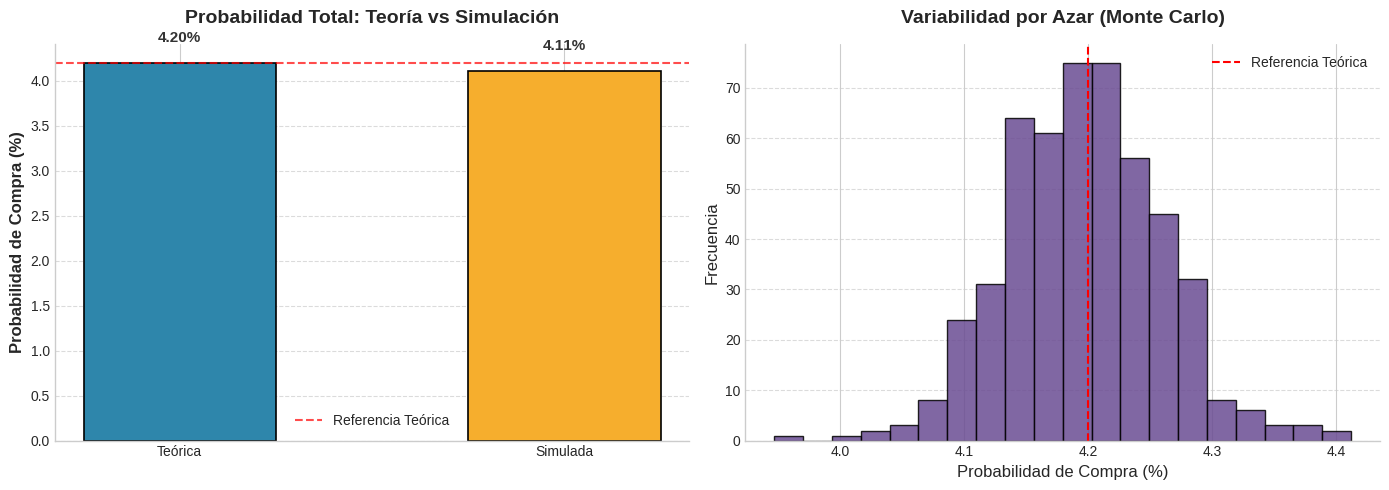

In [7]:
# ========================
# 5 Gráfico comparativo
# ========================
plt.style.use("seaborn-v0_8-whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Barra comparativa ---
colores = ["#2E86AB", "#F6AE2D"]
barras = axs[0].bar(
    ["Teórica", "Simulada"],
    [P_Compra_Total * 100, P_Compra_Simulada * 100],
    color=colores,
    edgecolor="black",
    linewidth=1.2,
    width=0.5
)

axs[0].axhline(P_Compra_Total * 100, color="red", linestyle="--", linewidth=1.5, alpha=0.7, label="Referencia Teórica")
axs[0].set_ylabel("Probabilidad de Compra (%)", fontsize=12, fontweight="bold")
axs[0].set_title("Probabilidad Total: Teoría vs Simulación", fontsize=14, fontweight="bold", pad=15)
axs[0].legend()

for barra in barras:
    altura = barra.get_height()
    axs[0].text(
        barra.get_x() + barra.get_width()/2, altura + 0.2,
        f"{altura:.2f}%",
        ha="center", va="bottom",
        fontsize=11, fontweight="bold",
        color="#333333"
    )

axs[0].yaxis.grid(True, linestyle="--", alpha=0.7)
for spine in ["top", "right"]:
    axs[0].spines[spine].set_visible(False)

# --- Histograma Monte Carlo ---
axs[1].hist(resultados * 100, bins=20, color="#6A4C93", edgecolor="black", alpha=0.85)
axs[1].axvline(P_Compra_Total * 100, color="red", linestyle="--", linewidth=1.5, label="Referencia Teórica")
axs[1].set_title("Variabilidad por Azar (Monte Carlo)", fontsize=14, fontweight="bold", pad=15)
axs[1].set_xlabel("Probabilidad de Compra (%)", fontsize=12)
axs[1].set_ylabel("Frecuencia", fontsize=12)
axs[1].legend()
axs[1].yaxis.grid(True, linestyle="--", alpha=0.7)
for spine in ["top", "right"]:
    axs[1].spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
# ========================
# 6 Resumen tipo reporte
# ========================
compradores_estimados = n_visitas * P_Compra_Total
compradores_simulados = compras.sum()
variacion_simulada = (P_Compra_Simulada - P_Compra_Total) * 100

print("RESUMEN EJECUTIVO")
print("="*40)
print(f"Probabilidad teórica calculada: {P_Compra_Total:.4f} ({P_Compra_Total*100:.2f}%)")
print(f"Probabilidad simulada: {P_Compra_Simulada:.4f} ({P_Compra_Simulada*100:.2f}%)")
print(f"Visitantes: {n_visitas:,}")
print(f"Compradores esperados (teoría): {compradores_estimados:,.0f}")
print(f"Compradores reales (simulación): {compradores_simulados:,}")
print(f"Diferencia entre teoría y simulación: {variacion_simulada:.2f} puntos porcentuales")
print("\nInterpretación:")
print("- La probabilidad teórica se calcula con la fórmula de probabilidad total considerando las dos fuentes de tráfico.")
print("- La simulación muestra que, debido al azar, el resultado real puede variar ligeramente.")
print("- El histograma Monte Carlo demuestra que incluso con las mismas probabilidades iniciales, los resultados fluctúan.")

RESUMEN EJECUTIVO
Probabilidad teórica calculada: 0.0420 (4.20%)
Probabilidad simulada: 0.0411 (4.11%)
Visitantes: 100,000
Compradores esperados (teoría): 4,200
Compradores reales (simulación): 4,110
Diferencia entre teoría y simulación: -0.09 puntos porcentuales

Interpretación:
- La probabilidad teórica se calcula con la fórmula de probabilidad total considerando las dos fuentes de tráfico.
- La simulación muestra que, debido al azar, el resultado real puede variar ligeramente.
- El histograma Monte Carlo demuestra que incluso con las mismas probabilidades iniciales, los resultados fluctúan.


# **Conclusiones del análisis**

Probabilidad total estimada: 4.20% de visitantes realizan una compra.

Proyección en 100,000 visitantes: Aproximadamente 4,200 compras.

Aportes por canal:

Google Ads aporta más conversiones porque combina mayor volumen de tráfico y mayor tasa de conversión.

Facebook Ads aporta menos debido a su menor tasa y volumen.

Efecto del azar: En la realidad, los resultados pueden variar, y en una simulación Monte Carlo se observan fluctuaciones naturales que podrían llevar la conversión a ser, por ejemplo, entre 4.10% y 4.30% en un periodo.

Uso en negocios: Esta metodología ayuda a prever ventas y planificar presupuestos de marketing, además de medir el riesgo de variaciones en los resultados.